In [ ]:
import numpy as np
import sklearn,sklearn.tree
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics
print(sklearn.__version__)

1.2.2


In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
train_data = pd.read_csv('sample_data/train.csv',sep=',',header=0)
train_data.shape

(9198, 9)

In [ ]:
test_data = pd.read_csv('sample_data/test.csv',sep=',',header=0)
test_data.shape

(1873, 8)

In [ ]:
cities_data = pd.read_csv('sample_data/cities.csv',sep=',',header=0)
cities_data.shape

(1216, 7)

In [ ]:
train_data.head()

,ID,Title,Description,Location,Bedrooms,Latitude,Longitude,ListingDate,Class
0,2,Take a Break; Unplug at the BNB on Milagro Farms,"You'll love the Back Door de Milagro, a Bed &a...",Forreston,1,32.233543,-96.862790,October 2016,1
1,3,Your Home Away From Home - Suite B,This private room is located in South Arlingto...,Arlington,1,32.623912,-999999.000000,October 2016,1
2,4,Quiet peaceful location,Quiet neighborhood very peaceful at night with...,Frisco,1,33.179972,-999999.000000,March 2016,1
3,5,Home Sweet Home,"My place is close to parks, the city center, a...",Boerne,2,29.779891,-98.694755,October 2016,2
4,7,Hideaway Guest Suite-Travis Heights,"Welcome to The Hideaway Guest Suite, a luxury ...",Austin,1,30.244405,-999999.000000,September 2012,2


In [ ]:
test_data.head()

,ID,Title,Description,Location,Bedrooms,Latitude,Longitude,ListingDate
0,1,Private Room in Dallas' most central location,"This Entire Place, or room depending on what y...",Dallas,1,32.892219,-96.727704,April 2017
1,6,5 BDR LAKE FRONT DELIGHT,"This lake front, 5 bdr, 4.5 bathroom home is a...",Richmond,4,29.633127,-95.754159,January 2017
2,18,"Updated Sea Horse Inn, 4 bedroom, 3 baths",Sea Horse Inn is perfect for 2 families or 4 c...,Port Aransas,4,27.777523,-97.103504,May 2017
3,25,Victory House-City on a Hill at Spring Creek,City on a Hill at Spring Creek 'in Fredericksb...,Fredericksburg,NaN,30.261163,-99.037596,May 2017
4,37,DKC Farm Bed & Breakfast,Relaxing country getaway equidistant to all ar...,Grand Saline,3,32.628218,-95.679786,March 2017


In [ ]:
cities_data.head()

,City,Population2010,Population2011,Population2012,Population2013,Population2014,Population2015
0,"Houston city, Texas","2,114,761","2,142,221","2,177,376","2,216,460","2,256,192","2,296,224"
1,"San Antonio city, Texas","1,333,953","1,359,461","1,386,305","1,412,979","1,440,309","1,469,845"
2,"Dallas city, Texas","1,200,699","1,219,300","1,243,131","1,260,432","1,280,450","1,300,092"
3,"Austin city, Texas","815,974","839,168","865,184","886,406","912,713","931,830"
4,"Fort Worth city, Texas","746,547","762,504","779,375","794,682","813,425","833,319"


### training data clean-up

In [ ]:
train_data2 = train_data.copy()

In [ ]:
train_data2['Date'] = pd.to_datetime(train_data2['ListingDate'])
train_data2['Year'] = train_data2['Date'].dt.year

In [ ]:
train_data2['Bedrooms'].value_counts()

1         4344
2         1573
3         1288
4          557
Studio     441
5          188
6           38
7           17
8           10
10           9
9            3
Name: Bedrooms, dtype: int64

In [ ]:
train_data2['Location'].value_counts()

Austin         961
Houston        770
Dallas         658
San Antonio    653
Fort Worth     344
              ... 
New ULM          1
Oak Point        1
San Benito       1
Bullard          1
Tarpley          1
Name: Location, Length: 467, dtype: int64

In [ ]:
train_data2['Class'].value_counts()

2    4320
1    4157
3     721
Name: Class, dtype: int64

In [ ]:
train_data2['Location'].isnull().value_counts()

False    9198
Name: Location, dtype: int64

In [ ]:
train_data2['Bedrooms'].isnull().value_counts()         # some listings do not have number of bedrooms

False    8468
True      730
Name: Bedrooms, dtype: int64

In [ ]:
train_data2['Class'].isnull().value_counts()

False    9198
Name: Class, dtype: int64

In [ ]:
train_data2['Latitude'].isnull().value_counts()

False    9194
True        4
Name: Latitude, dtype: int64

In [ ]:
#these locations do not have latitude
train_data2[train_data2['Latitude'].isnull()]

,ID,Title,Description,Location,Bedrooms,Latitude,Longitude,ListingDate,Class,Date,Year
2232,2718,"Stay here, close to DFW Airport.",My place is close to the airport.. You'll love...,Grapevine,1,NaN,-999999.0,August 2015,1,2015-08-01,2015
2808,3389,Relax with Room for everyone!,Newly built home with modern finishes. Large o...,San Antonio,NaN,NaN,NaN,July 2015,2,2015-07-01,2015
6546,7877,Your home away from home in DFW I,"Our place is close to restaurants and dining, ...",Flower Mound,1,NaN,NaN,October 2016,1,2016-10-01,2016
6860,8253,"The Woodland Cottage near Brenham, Texas","Surrounded by trees, the Woodland Cottage is a...",Brenham,1,NaN,NaN,October 2014,2,2014-10-01,2014


In [ ]:
train_data2['Longitude'].isnull().value_counts()

False    9195
True        3
Name: Longitude, dtype: int64

In [ ]:
#these locations do not have longitude
train_data2[train_data2['Longitude'].isnull()]

,ID,Title,Description,Location,Bedrooms,Latitude,Longitude,ListingDate,Class,Date,Year
2808,3389,Relax with Room for everyone!,Newly built home with modern finishes. Large o...,San Antonio,NaN,NaN,NaN,July 2015,2,2015-07-01,2015
6546,7877,Your home away from home in DFW I,"Our place is close to restaurants and dining, ...",Flower Mound,1,NaN,NaN,October 2016,1,2016-10-01,2016
6860,8253,"The Woodland Cottage near Brenham, Texas","Surrounded by trees, the Woodland Cottage is a...",Brenham,1,NaN,NaN,October 2014,2,2014-10-01,2014


In [ ]:
# remove training records without bedrooms, latitude and/ or longitude
# there is 730 records without bedrooms plus 4 without lat/ long values
# in total we only lose 734/9195 = 8% training records
train_data2 = train_data2[~train_data2['Bedrooms'].isnull()].copy()
train_data2 = train_data2[~train_data2['Latitude'].isnull()].copy()
train_data2.shape

(8465, 11)

In [ ]:
train_data2.reset_index(inplace=True,drop=True)

#### train-test split

In [ ]:
y = train_data2["Class"]
X = train_data2[["Bedrooms","Latitude","Longitude"]]

In [ ]:
X['Bedrooms'] = X['Bedrooms'].apply(lambda x: str(x))
X['Bedrooms'] = X['Bedrooms'].str.replace("Studio","11")
X['Bedrooms'] = X['Bedrooms'].apply(lambda x: int(x))

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_test.shape, X_train.shape

((2117, 3), (6348, 3))

#### test data clean-up

In [ ]:
test_data2 = test_data.copy()

In [ ]:
test_data2['Date'] = pd.to_datetime(test_data2['ListingDate'])
test_data2['Year'] = test_data2['Date'].dt.year

In [ ]:
test_data2['Bedrooms'].value_counts()

1         686
2         355
3         325
4         186
Studio     94
5          52
6           8
7           6
13          1
11          1
Name: Bedrooms, dtype: int64

In [ ]:
test_data2['Bedrooms'].isnull().value_counts()   # some listings do not have number of bedrooms

False    1714
True      159
Name: Bedrooms, dtype: int64

In [ ]:
test_data2['Location'].isnull().value_counts()

False    1873
Name: Location, dtype: int64

In [ ]:
test_data2['Longitude'].isnull().value_counts()

False    1871
True        2
Name: Longitude, dtype: int64

In [ ]:
test_data2['Latitude'].isnull().value_counts()

False    1871
True        2
Name: Latitude, dtype: int64

In [ ]:
# these records do not have latitude / longitude
test_data2[test_data2['Latitude'].isnull()]

,ID,Title,Description,Location,Bedrooms,Latitude,Longitude,ListingDate,Date,Year
984,5734,Bluebonnet - 50' Power Boat,Have a great nigh stay in downtown Corpus Chri...,Corpus Christi,3,NaN,NaN,May 2017,2017-05-01,2017
1813,10737,Harbor Lights Cottages #4,Watch the sunrise from your front porch!,Fulton,2,NaN,NaN,April 2017,2017-04-01,2017


In [ ]:
# remove test records without bedrooms, latitude and/ or longitude
test_data2 = test_data2[~test_data2['Bedrooms'].isnull()].copy()
test_data2 = test_data2[~test_data2['Latitude'].isnull()].copy()
test_data2.shape

(1712, 10)

In [ ]:
test_data2.reset_index(inplace=True,drop=True)

## EDA

In [ ]:
train_data.shape

(9198, 9)

In [ ]:
train_data.describe(include='all')

,ID,Title,Description,Location,Bedrooms,Latitude,Longitude,ListingDate,Class
count,9198.000000,9196,9181,9198,8468,9194.000000,9195.000000,9198,9198.000000
unique,NaN,9141,9153,467,11,NaN,NaN,96,NaN
top,NaN,Home Away From Home,"My place is good for couples, solo adventurers...",Austin,1,NaN,NaN,June 2016,NaN
freq,NaN,9,10,961,4344,NaN,NaN,351,NaN
mean,5539.230376,NaN,NaN,NaN,NaN,-44782.598887,-134504.827832,NaN,1.626441
std,3192.969782,NaN,NaN,NaN,NaN,206907.999629,341089.026864,NaN,0.625163
min,2.000000,NaN,NaN,NaN,NaN,-999999.000000,-999999.000000,NaN,1.000000
25%,2797.250000,NaN,NaN,NaN,NaN,29.575944,-98.446047,NaN,1.000000
50%,5552.000000,NaN,NaN,NaN,NaN,30.175801,-97.377236,NaN,2.000000
75%,8296.750000,NaN,NaN,NaN,NaN,32.232824,-96.626281,NaN,2.000000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9198 entries, 0 to 9197
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           9198 non-null   int64  
 1   Title        9196 non-null   object 
 2   Description  9181 non-null   object 
 3   Location     9198 non-null   object 
 4   Bedrooms     8468 non-null   object 
 5   Latitude     9194 non-null   float64
 6   Longitude    9195 non-null   float64
 7   ListingDate  9198 non-null   object 
 8   Class        9198 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 646.9+ KB


In [ ]:
#duplicates
train_data.nunique()

ID             9198
Title          9141
Description    9153
Location        467
Bedrooms         11
Latitude       8783
Longitude      7960
ListingDate      96
Class             3
dtype: int64

In [ ]:
#missing values
train_data.isnull().sum()

ID               0
Title            2
Description     17
Location         0
Bedrooms       730
Latitude         4
Longitude        3
ListingDate      0
Class            0
dtype: int64

In [ ]:
# listings by number of bedrooms
%matplotlib inline
import pylab as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

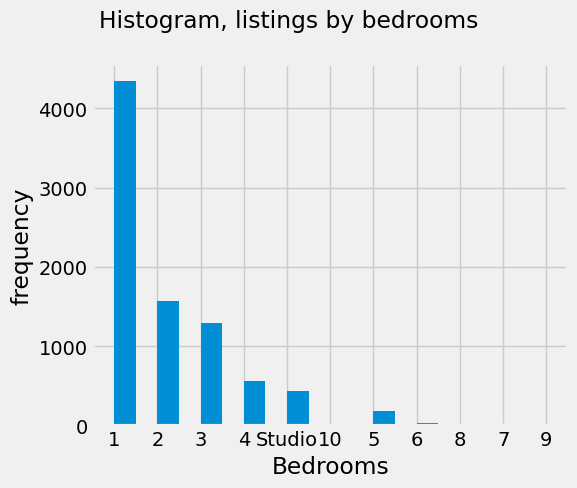

In [ ]:
#histogram of non-null bedrooms
train_data2['Bedrooms'].hist(bins=20, figsize=(6,5))
plt.suptitle('Histogram, listings by bedrooms')
plt.xlabel("Bedrooms")
plt.ylabel("frequency")
plt.tight_layout();

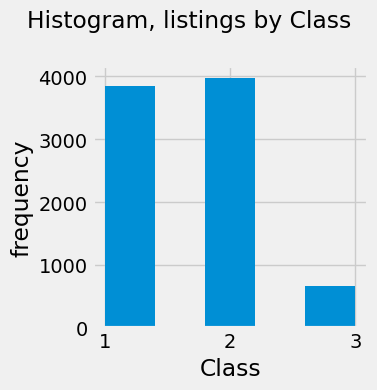

In [ ]:
#histogram of non-null bedrooms
train_data2['Class'].hist(bins=5, figsize=(4,4))
plt.suptitle('Histogram, listings by Class')
plt.xlabel("Class")
plt.ylabel("frequency")
plt.tight_layout();

In [ ]:
#listings by year
class_by_yr = train_data2.groupby(by=['Year','Class'], as_index=False).count()[['Year','Class','ID']]
class_by_yr.rename(columns={'ID':'Count'}, inplace=True)

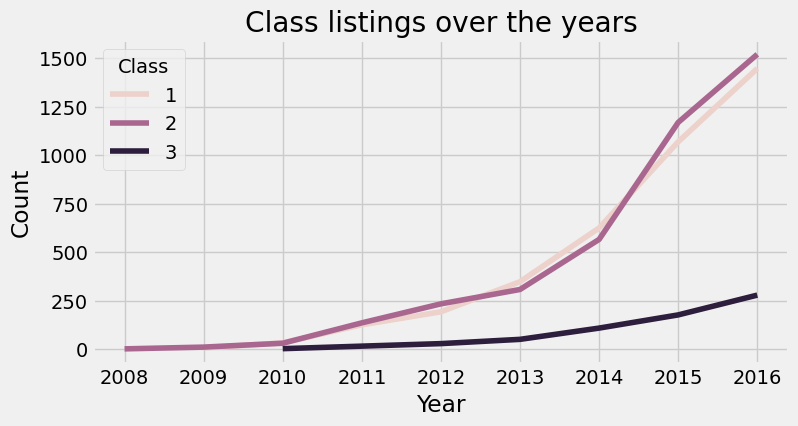

In [ ]:
plt.figure(figsize = (8,4))
sns.lineplot(data = class_by_yr, x='Year',y='Count', hue='Class')
plt.title("Class listings over the years")
plt.show();   #there has been a general increase in listings since 2010

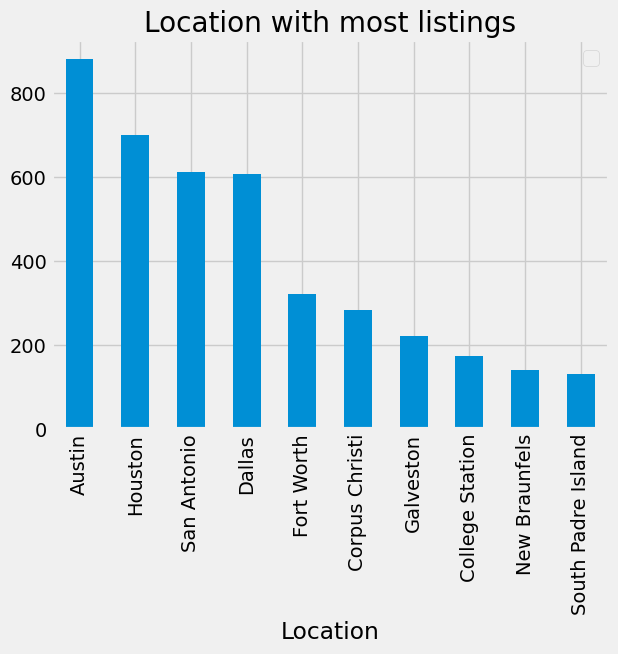

In [ ]:
#barplot by location
train_data2.groupby('Location').agg({'ID':'count'}).sort_values(by='ID',ascending=False).iloc[0:10,:].plot.bar()
plt.title('Location with most listings')
plt.legend('')
plt.show();

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [ ]:
data1 = train_data2[train_data2['Class']==1].groupby(by='Location',as_index=False).agg({'ID':'count','Latitude':'median','Longitude':'median'}).sort_values(by='ID',ascending=False)
data1 = data1.head(50)

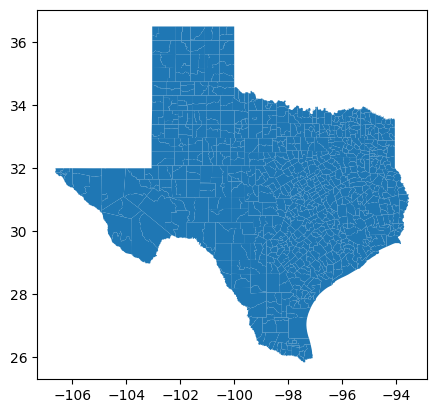

In [ ]:
texas_map = gpd.read_file('sample_data/tl_2016_48_cousub.shp')
texas_map.plot();

<Axes: >

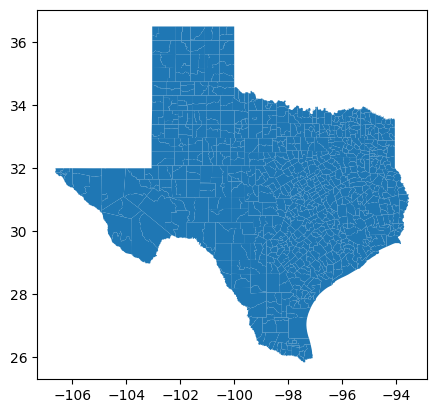

In [ ]:
texas_map.to_crs(epsg=4326).plot()

In [ ]:
crs = {'init':'EPSG:4326'}
geometry1 = [Point(xy) for xy in zip(data1['Longitude'], data1['Latitude'])]
geo_df1 = gpd.GeoDataFrame(data1,
                          crs = crs,
                          geometry = geometry1)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
geo_df1.head()

,Location,ID,Latitude,Longitude,geometry
129,Houston,485,29.741322,-95.398517,POINT (-95.39852 29.74132)
18,Austin,476,30.280347,-97.761831,POINT (-97.76183 30.28035)
87,Dallas,430,32.819017,-96.790849,POINT (-96.79085 32.81902)
227,San Antonio,399,29.472717,-98.499691,POINT (-98.49969 29.47272)
108,Fort Worth,184,32.735400,-97.367013,POINT (-97.36701 32.73540)


Text(0.5, 1.0, 'Class 1 Heatmap')

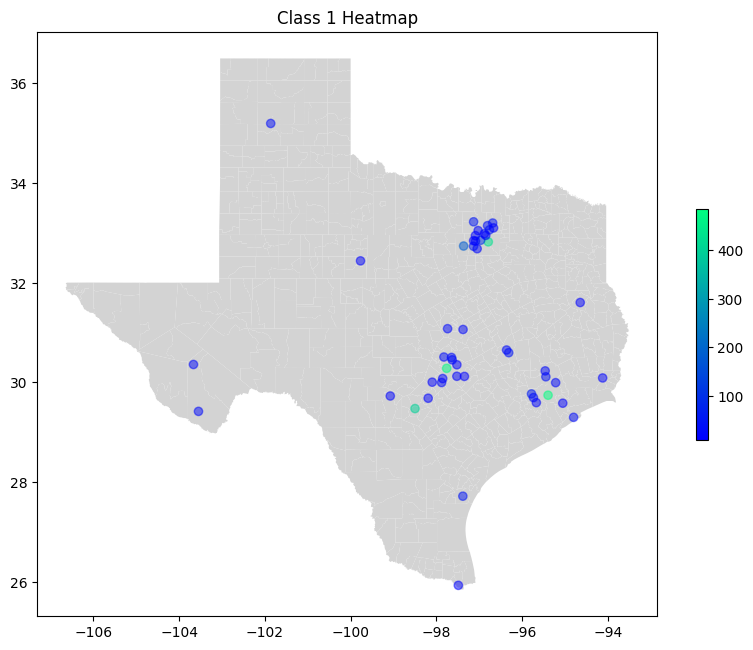

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))

texas_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df1.plot(column = 'ID', ax=ax, cmap = 'winter',
            legend = True, legend_kwds={'shrink': 0.3},
            alpha = .5)
ax.set_title('Class 1 Heatmap')

In [ ]:
data2 = train_data2[train_data2['Class']==2].groupby(by='Location',as_index=False).agg({'ID':'count','Latitude':'median','Longitude':'median'}).sort_values(by='ID',ascending=False)
data2 = data2.head(50)

In [ ]:
crs = {'init':'EPSG:4326'}
geometry2 = [Point(xy) for xy in zip(data2['Longitude'], data2['Latitude'])]
geo_df2 = gpd.GeoDataFrame(data2,
                          crs = crs,
                          geometry = geometry2)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
geo_df2.head()

,Location,ID,Latitude,Longitude,geometry
14,Austin,363,30.265866,-97.759105,POINT (-97.75911 30.26587)
91,Corpus Christi,217,27.607900,-97.225049,POINT (-97.22505 27.60790)
290,San Antonio,207,29.466409,-98.539168,POINT (-98.53917 29.46641)
135,Galveston,182,29.285028,-94.823817,POINT (-94.82382 29.28503)
98,Dallas,158,32.807493,-96.799886,POINT (-96.79989 32.80749)


Text(0.5, 1.0, 'Class 2 Heatmap')

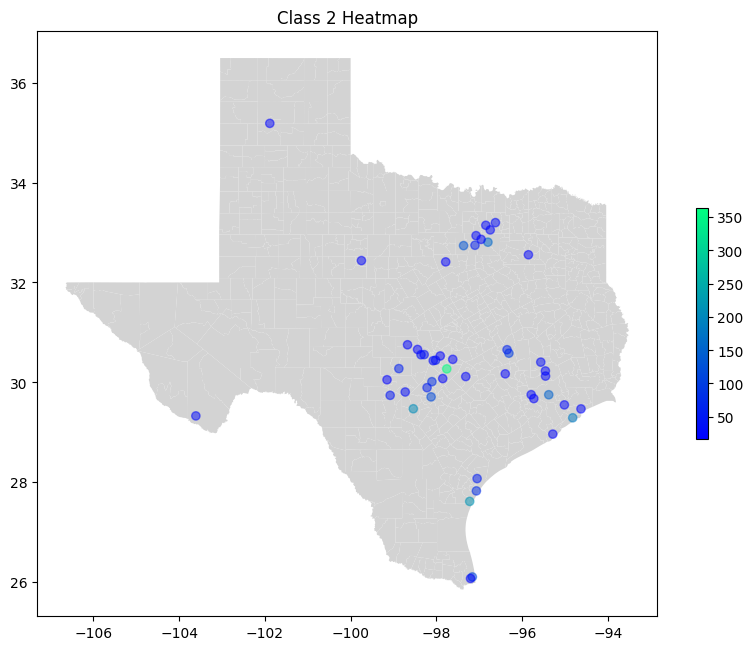

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))

texas_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df2.plot(column = 'ID', ax=ax, cmap = 'winter',
            legend = True, legend_kwds={'shrink': 0.3},
            alpha = .5)
ax.set_title('Class 2 Heatmap')

In [ ]:
data3 = train_data2[train_data2['Class']==3].groupby(by='Location',as_index=False).agg({'ID':'count','Latitude':'median','Longitude':'median'}).sort_values(by='ID',ascending=False)
data3 = data3.head(20)

In [ ]:
crs = {'init':'EPSG:4326'}
geometry3 = [Point(xy) for xy in zip(data3['Longitude'], data3['Latitude'])]
geo_df3 = gpd.GeoDataFrame(data3,
                          crs = crs,
                          geometry = geometry3)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
geo_df3.head()

,Location,ID,Latitude,Longitude,geometry
81,Houston,66,29.745697,-95.322325,POINT (-95.32232 29.74570)
9,Austin,43,30.270699,-97.800340,POINT (-97.80034 30.27070)
32,Canyon Lake,30,29.869815,-98.256312,POINT (-98.25631 29.86982)
43,College Station,27,30.610055,-96.290755,POINT (-96.29075 30.61006)
25,Bryan,21,30.638156,-96.352629,POINT (-96.35263 30.63816)


Text(0.5, 1.0, 'Class 3 Heatmap')

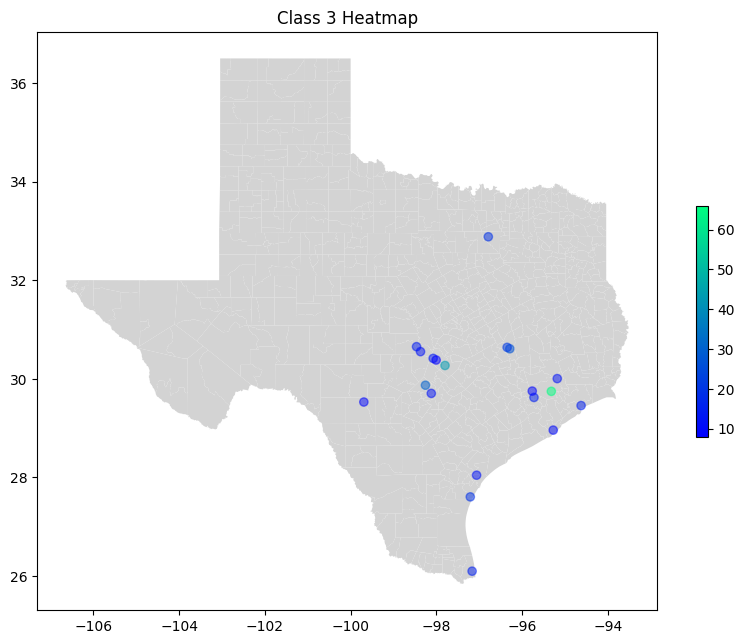

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))

texas_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df3.plot(column = 'ID', ax=ax, cmap = 'winter',
            legend = True, legend_kwds={'shrink': 0.3},
            alpha = .5)
ax.set_title('Class 3 Heatmap')

## Model Building

#### Decision Tree


In [ ]:
# Decision tree
clf_pruned= sklearn.tree.DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth=4, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=100)

In [ ]:
#visualizing the tree
import io
from io import StringIO
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

In [ ]:
feature_cols = X.columns

In [ ]:
dot_data = StringIO()

In [ ]:
export_graphviz(clf_pruned, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2','3'])

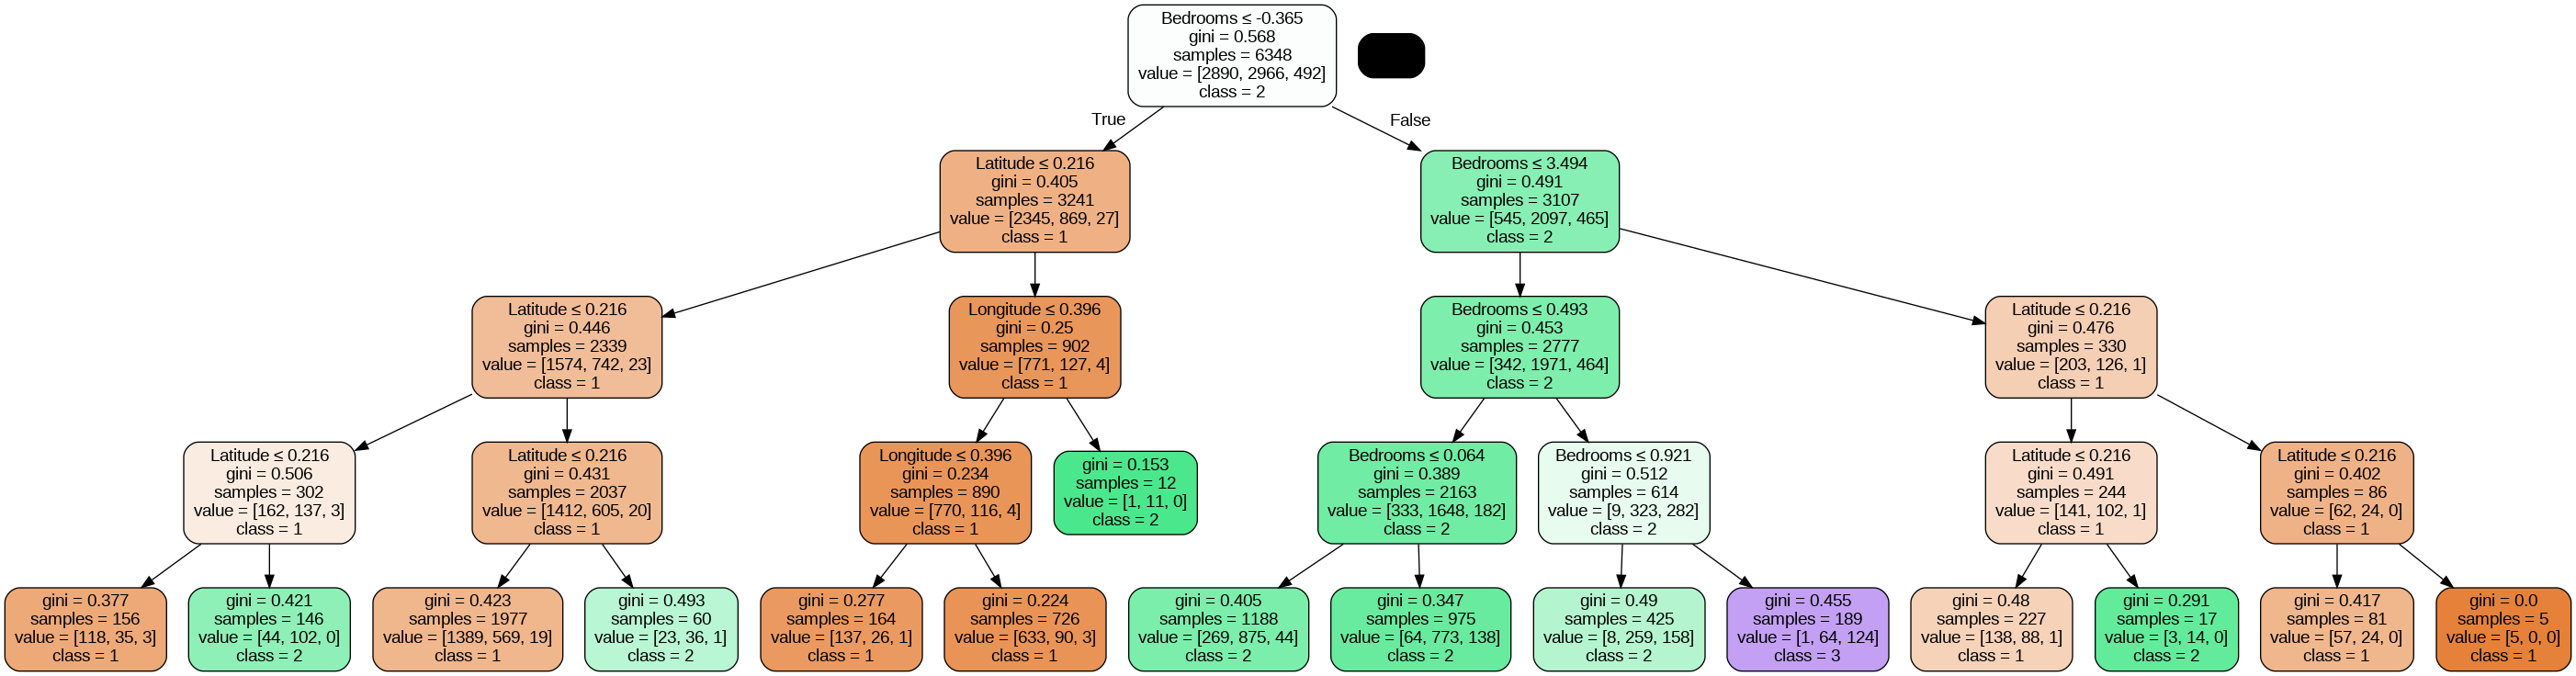

In [ ]:
from pydot import graph_from_dot_data
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
# Predicting the Test set results
y_pred = clf_pruned.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[816, 134,   0],
       [311, 672,  19],
       [  7, 101,  57]])

In [ ]:
accuracy= metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred, average = 'weighted')
precision = metrics.precision_score(y_test,y_pred, average = 'weighted')
print(accuracy,recall,precision)

0.7298063297118564 0.7298063297118564 0.7320424048839059


#### XGBoost - Ensemble method

In [ ]:
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
y_train_xg = y_train-1
classifier_xg.fit(X_train, y_train_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Predicting the Test set results
y_pred = classifier_xg.predict(X_test)
cm = metrics.confusion_matrix(y_test-1, y_pred)
cm

array([[772, 172,   6],
       [189, 777,  36],
       [  7,  83,  75]])

In [ ]:
accuracy= metrics.accuracy_score(y_test-1,y_pred)
recall = metrics.recall_score(y_test-1,y_pred, average='weighted')
precision = metrics.precision_score(y_test-1,y_pred, average='weighted')
print(accuracy,recall,precision)

0.7671232876712328 0.7671232876712328 0.7642072033850159


#### Random Forest - Ensemble method

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 15, max_depth = 8,criterion = 'gini', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=15, random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier_rf.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[799, 151,   0],
       [270, 714,  18],
       [  7, 115,  43]])

In [ ]:
accuracy= metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred, average='weighted')
precision = metrics.precision_score(y_test,y_pred, average= 'weighted')
print(accuracy,recall,precision)

0.7350023618327822 0.7350023618327822 0.7330074869212967


#### Support Vector Machine - SVM

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'rbf', random_state = 0)
classifier_svc.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier_svc.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[838, 112,   0],
       [356, 643,   3],
       [ 11, 138,  16]])

In [ ]:
accuracy= metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred, average = 'weighted')
precision = metrics.precision_score(y_test,y_pred, average = 'weighted')
print(accuracy,recall,precision)

0.7071327350023618 0.7071327350023618 0.7185149509942388


### Best Model
#### XGBoost


In [ ]:
X.shape

(8465, 3)

In [ ]:
X.columns

Index(['Bedrooms', 'Latitude', 'Longitude'], dtype='object')

In [ ]:
y.shape

(8465,)

In [ ]:
X_test_final = test_data2[['Bedrooms','Latitude','Longitude']]

In [ ]:
X_test_final['Bedrooms'] = X_test_final['Bedrooms'].apply(lambda x: str(x))
X_test_final['Bedrooms'] = X_test_final['Bedrooms'].str.replace("Studio","11")
X_test_final['Bedrooms'] = X_test_final['Bedrooms'].apply(lambda x: int(x))

<ipython-input-165-e7aec4b321e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_final['Bedrooms'] = X_test_final['Bedrooms'].apply(lambda x: str(x))
<ipython-input-165-e7aec4b321e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_final['Bedrooms'] = X_test_final['Bedrooms'].str.replace("Studio","11")
<ipython-input-165-e7aec4b321e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [ ]:
X_test_final.shape

(1712, 3)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_finalz = sc.fit_transform(X)
X_test_finalz = sc.transform(X_test_final)

In [ ]:
from xgboost import XGBClassifier
classifier_finalz = XGBClassifier()
y_train_finalz = y-1
classifier_finalz.fit(X_train_finalz, y_train_finalz)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_prob_finalz = classifier_finalz.predict_proba(X_test_finalz)
y_pred_finalz = classifier_finalz.predict(X_test_finalz)

In [ ]:
y_pred_finalz

array([0, 2, 1, ..., 1, 1, 1])

In [ ]:
y_prob_finalz

array([[9.8816395e-01, 1.1237411e-02, 5.9861137e-04],
       [1.3723376e-02, 1.8528861e-01, 8.0098802e-01],
       [3.8977447e-03, 6.2019652e-01, 3.7590578e-01],
       ...,
       [1.7246187e-02, 9.7481436e-01, 7.9394169e-03],
       [3.6886492e-01, 5.1705801e-01, 1.1407706e-01],
       [1.2515313e-02, 9.8248440e-01, 5.0003398e-03]], dtype=float32)

In [ ]:
# top 10 predictions
final_pred = test_data2.copy()
final_pred['Class_Predictions'] = y_pred_finalz+1
final_pred.head(10)

,ID,Title,Description,Location,Bedrooms,Latitude,Longitude,ListingDate,Date,Year,Class_Predictions
0,1,Private Room in Dallas' most central location,"This Entire Place, or room depending on what y...",Dallas,1,32.892219,-96.727704,April 2017,2017-04-01,2017,1
1,6,5 BDR LAKE FRONT DELIGHT,"This lake front, 5 bdr, 4.5 bathroom home is a...",Richmond,4,29.633127,-95.754159,January 2017,2017-01-01,2017,3
2,18,"Updated Sea Horse Inn, 4 bedroom, 3 baths",Sea Horse Inn is perfect for 2 families or 4 c...,Port Aransas,4,27.777523,-97.103504,May 2017,2017-05-01,2017,2
3,37,DKC Farm Bed & Breakfast,Relaxing country getaway equidistant to all ar...,Grand Saline,3,32.628218,-95.679786,March 2017,2017-03-01,2017,2
4,40,26506 Willow,"My place is good for couples, business travele...",Katy,4,29.739205,-95.830856,March 2017,2017-03-01,2017,2
5,52,SUPERBOWL SUNDAY 8min fr Bush (IAH) airport 2b...,Spend Superbowl Sunday weekend in this modern ...,Humble,2,30.000014,-95.279788,January 2017,2017-01-01,2017,1
6,56,Entertainment-Friendly With Theater Room!,Very easy access to Hardy Toll Rd or I-45 whic...,Spring,2,30.121561,-95.383037,January 2017,2017-01-01,2017,1
7,59,Baytown apartments,My place is close to 30 min from superbowl in ...,Baytown,3,-999999.000000,-999999.000000,January 2017,2017-01-01,2017,2
8,60,Bay Lodge,Beautiful large home located in Rockport right...,Rockport,4,28.040595,-97.037070,April 2017,2017-04-01,2017,3
9,67,Conveniently Located Private Home,Two-story home (3000 square ft.) with natural ...,Irving,3,32.843246,-96.966238,May 2017,2017-05-01,2017,1


In [ ]:
final_probabilities = pd.DataFrame({"ID":test_data2['ID'], "Class_1_Prob": y_prob_finalz[:,0], "Class_2_Prob":y_prob_finalz[:,1], "Class_3_Prob": y_prob_finalz[:,2]})

In [ ]:
final_probabilities.head()

,ID,Class_1_Prob,Class_2_Prob,Class_3_Prob
0,1,0.988164,0.011237,0.000599
1,6,0.013723,0.185289,0.800988
2,18,0.003898,0.620197,0.375906
3,37,0.041576,0.720938,0.237486
4,40,0.010313,0.783191,0.206496


In [ ]:
final_probabilities.to_csv('sample_data/submission_final.csv', index=False)

## Proportion of Luxury

In [ ]:
new_location = train_data2[train_data2['Location']=='College Station'].copy()
other_location = train_data2[train_data2['Location']!='College Station'].copy()

In [ ]:
new_location.shape

(175, 11)

In [ ]:
other_location.shape

(8290, 11)

In [ ]:
new_location.groupby(by = 'Class', as_index=False).agg({"ID":'count'})

,Class,ID
0,1,48
1,2,100
2,3,27


In [ ]:
print(27/(48+100+27))

0.15428571428571428


In [ ]:
other_location.groupby(by = 'Class', as_index=False).agg({"ID":'count'})

,Class,ID
0,1,3792
1,2,3868
2,3,630


In [ ]:
print(630/(3792+3868+630))

0.07599517490952955


In [ ]:
import scipy.stats as stats

In [ ]:
ttest,p_value = stats.ttest_ind(0.07599,0.15428)
print("p value:%.8f" % p_value)
print("since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:%.4f" %(p_value/2))
if p_value/2 <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

p value:nan
since the hypothesis is one sided >> use p_value/2 >> p_value_one_sided:nan
Fail to reject null hypothesis


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in double_scalars
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


In [ ]:
####### DID NOT USE BELOW

## Other model

### cities data

In [ ]:
import re

In [ ]:
def city_clean(x):
  if re.search(r'.+(?= city, Texas)',x):
    return re.search(r'.+(?= city, Texas)',x).group()
  elif re.search(r'.+(?= town, Texas)',x):
    return re.search(r'.+(?= town, Texas)',x).group()
  elif re.search(r'.+(?= village, Texas)',x):
    return re.search(r'.+(?= village, Texas)',x).group()
  else:
    return re.search(r'.+(?= \()',x).group()

In [ ]:
cities_data['City_Only'] = [city_clean(s) for s in cities_data['City']]

In [ ]:
cities_data.head()

,City,Population2010,Population2011,Population2012,Population2013,Population2014,Population2015,City_Only
0,"Houston city, Texas","2,114,761","2,142,221","2,177,376","2,216,460","2,256,192","2,296,224",Houston
1,"San Antonio city, Texas","1,333,953","1,359,461","1,386,305","1,412,979","1,440,309","1,469,845",San Antonio
2,"Dallas city, Texas","1,200,699","1,219,300","1,243,131","1,260,432","1,280,450","1,300,092",Dallas
3,"Austin city, Texas","815,974","839,168","865,184","886,406","912,713","931,830",Austin
4,"Fort Worth city, Texas","746,547","762,504","779,375","794,682","813,425","833,319",Fort Worth
